# Loading Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install control
#!pip install torch==1.7.0 

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as MSE

#import control.matlab 
import matplotlib.pyplot as plt
import math as mt

# Synthetic data generation

In [ ]:
series1 = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Data sets/new data gen/initial/Input.csv')
temp = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Data sets/new data gen/initial/Output.csv')
disturbance = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Disturbance+added.csv')
only_input = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Only_manipulated_input.csv')
states_with_noise = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/True_states_PRocessnoise.csv')
plant_measurement = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/Plant_Measurement_2.csv')

#######################################################
estimated_using_1stprinciple = pd.read_csv('/content/drive/MyDrive/data sets for google collab/project mtech/CSTR+-+State+estimation+using+1st+principle.csv')
#######################################################

temp = np.asarray(temp)
series1 = np.asarray(series1)
disturbance = np.array(disturbance)
only_input = np.array(only_input)
plant_measurement = np.array(plant_measurement)
states_with_noise = np.array(states_with_noise)
estimated_using_1stprinciple = np.array(estimated_using_1stprinciple)

print('Length of the total dataset:',len(series1))

#######################################################
temp[:,0] = 100*temp[:,0]
#print(temp)

#series1[:,-1]  = series1[:,-1]*100
#######################################################

series_temp = temp[:15000]
series = series1[:15000]
series_disturbance = disturbance[:15000]
series_onlyinput = only_input[:15000]
series_plantmeasurement = plant_measurement[:15000]
series_statewithnoise = states_with_noise[:15000]

series_test = series1[15000:16666]
series_test_temp = temp[15000:16666]
series_test_disturbance = disturbance[15000:16666]
series_test_onlyinput = only_input[15000:16666]
series_test_plantmeasurement = plant_measurement[15000:16666]
series_test_statewithnoise = states_with_noise[15000:16666]

print('Length of the training set:',len(series),'\nLength of test set:',len(series_test))



Length of the total dataset: 19998
Length of the training set: 15000 
Length of test set: 1666


In [ ]:
print('Input:',series.shape, type(series))
print('Output:',series_temp.shape, type(series_temp))
print('disturbance:',series_disturbance.shape,type(series_disturbance))
print('Only manipulated input:',series_onlyinput.shape,type(series_onlyinput))
print('Plant measurement:',series_plantmeasurement.shape,type(series_plantmeasurement))
print('Only manipulated input:',series_statewithnoise.shape,type(series_statewithnoise))

Input: (15000, 4) <class 'numpy.ndarray'>
Output: (15000, 2) <class 'numpy.ndarray'>
disturbance: (15000, 1) <class 'numpy.ndarray'>
Only manipulated input: (15000, 2) <class 'numpy.ndarray'>
Plant measurement: (15000, 2) <class 'numpy.ndarray'>
Only manipulated input: (15000, 2) <class 'numpy.ndarray'>


In [ ]:
print('manipulated input:\n',series,'\n')
print('temp: \n',series_temp,'\n')
print('Disturbance: \n', series_disturbance,'\n')
print('Only manipulated input: \n', series_onlyinput,'\n')

manipulated input:
 [[9.0000e-01 1.3500e+01 3.9395e+02 2.6449e-01]
 [9.0000e-01 1.3500e+01 3.9528e+02 2.4712e-01]
 [9.0000e-01 1.3500e+01 3.9571e+02 2.3385e-01]
 ...
 [1.1000e+00 1.6500e+01 3.9497e+02 2.7689e-01]
 [1.1000e+00 1.6500e+01 3.9499e+02 2.7516e-01]
 [9.0000e-01 1.3500e+01 3.9488e+02 2.7479e-01]] 

temp: 
 [[ 24.712 395.28 ]
 [ 23.385 395.71 ]
 [ 22.842 395.26 ]
 ...
 [ 27.516 394.99 ]
 [ 27.479 394.88 ]
 [ 27.571 394.7  ]] 

Disturbance: 
 [[1.9934]
 [2.0004]
 [2.0104]
 ...
 [2.0076]
 [2.0026]
 [2.0173]] 

Only manipulated input: 
 [[ 0.9 13.5]
 [ 0.9 13.5]
 [ 0.9 13.5]
 ...
 [ 1.1 16.5]
 [ 1.1 16.5]
 [ 0.9 13.5]] 



#Visualization


(15000, 4)


Text(0.5, 1.0, 'Temperature vs time instant')

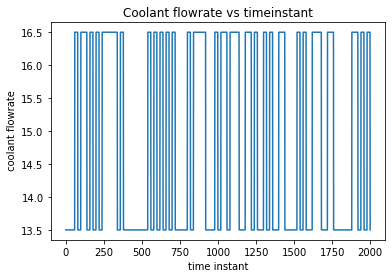

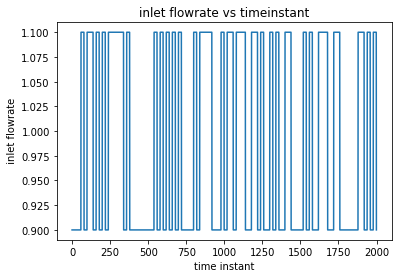

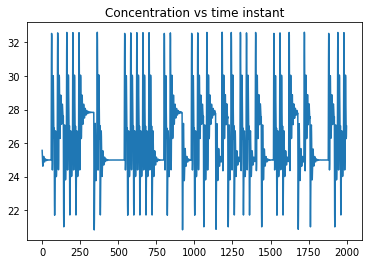

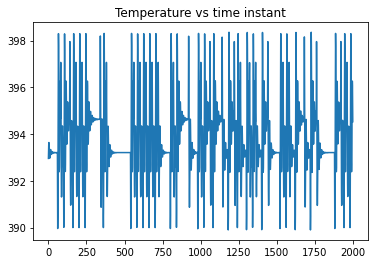

In [ ]:
print(series.shape)
plt.figure(1)
plt.plot(series[1000:3000,1])
plt.xlabel('time instant')
plt.ylabel(' coolant flowrate')
plt.title('Coolant flowrate vs timeinstant')

plt.figure(2)
plt.plot(series[1000:3000,0])
plt.xlabel('time instant')
plt.ylabel(' inlet flowrate')
plt.title('inlet flowrate vs timeinstant')

plt.figure(3)
plt.plot(series_temp[1000:3000,0])
# print(series_temp[0:100,0])
plt.title('Concentration vs time instant')

plt.figure(4)
plt.plot(series_temp[1000:3000,1])
# print(series_temp[0:100,0])
plt.title('Temperature vs time instant')

# DataLoader Function

In [ ]:
def Dataloader(seriesss,target,T):
     
     data4 = []
     output = []

     for i in range(len(seriesss)-T):
         x = seriesss[i:i+T]
         data4.append(x)

         y = target[i+T-1]
         output.append(y)

     data4 = np.asarray(data4)
     output = np.asarray(output)

     data4 = data4.reshape(-1,T,4)
     output = output.reshape(-1,2)# change when output length changes


     return data4,output

# Generate Data Loader

Here T=10 represent that we are considering past 10 samples to predict the next 11th step

In [ ]:
T = 10
data = []
target = []

for item in range(len(series)-T):

    x = series[item:item+T]
    data.append(x)

    y = series_temp[item+T-1]
    target.append(y)

data = np.asarray(data)
target = np.asarray(target)

print(data.shape, target.shape)

data = data.reshape(-1,T,4)
target = target.reshape(-1,2)   # use .reshape(-1,1) for predicting only temp

print('Shape of the dataloader:',data.shape,'\nShape of target variable', target.shape)

N = len(data)        # As now number of windows is equal to number of samples


(14990, 10, 4) (14990, 2)
Shape of the dataloader: (14990, 10, 4) 
Shape of target variable (14990, 2)


In [ ]:
# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# Model making

In [ ]:
class SimpleRNN(nn.Module):
    def __init__(self,n_input, n_hidden, n_rnnlayers, n_outputs):
        super(SimpleRNN, self).__init__()

        torch.manual_seed(1)
        self.D = n_input
        self.M = n_hidden
        self.K = n_outputs
        #self.O = 3 
        self.L = n_rnnlayers

        # note batch_first = True
        # applies the convention that out data will be shape:
        # (num_samples, sequence length, num_features)
        # rather than :
        # (sequence_length, num_samples, num_features )

        self.rnn = nn.RNN(
            input_size = self.D,
            hidden_size = self.M,
            num_layers = self.L,
            nonlinearity = 'relu',
            batch_first = True,
            #dropout = 0.001
        )

#########################################################
        self.fc = nn.Linear(self.M,self.K)
#########################################################

        # self.fc = nn.Linear(self.M,self.O)
        # self.final = nn.Linear(self.O,self.K)

    def forward(self,data):
        # initial hidden states

        h0 = torch.zeros(self.L,data.size(0),self.M).to(device)
        #print('h0: ',h0.shape)
        #h0 = h0.to(device)

        # get RNN unit output
        # out is of size (N,T,M)
        # 2nd return value is hidden states at each hidden layer
        # we don't need those right now 

        #######################out,_ = self.rnn(data,h0)

        out_h2, out_h1 = self.rnn(data,h0) # new adjustment

        #print('out_h1: ',out_h1.shape)




        # we only want h(T) at the final time step
        # N x M --> N x K

        #######################out = self.fc(out[:,-1,:])
        out = self.fc(out_h2[:,-1,:])    #new adjustment
        return out,out_h1


# Load saved model

In [ ]:
#Before using this run Simple RNN cell

#loading entire model
#model = torch.load('/content/drive/MyDrive/data sets for google collab/project mtech/manual RNN 1/relu/T10_2/model_conc_100_relu_T10.pth')

#print(model)

model = torch.load('/content/drive/MyDrive/data sets for google collab/project mtech/model_without_noise2.pth',map_location=torch.device('cpu'))

print(model)

SimpleRNN(
  (rnn): RNN(4, 8, num_layers=2, batch_first=True)
  (fc): Linear(in_features=8, out_features=2, bias=True)
)


# Instantiating the model ( skip this if loading model )

In [ ]:
# Instantiate the model
#model = SimpleRNN(n_input = 4, n_hidden = 8, n_rnnlayers = 2, n_outputs = 2) #changed to 2 when both state estimated
#model.to(device)


# Loss and Optimizer ( skip this if loading model )

In [ ]:
# Loss and Optimizer

criterion = nn.MSELoss()
opt = torch.optim.Adam(model.parameters() , lr = 0.0015)

# Splitting into train and validation

In [ ]:
x_train = torch.from_numpy(data[:13333].astype(np.float32))
y_train = torch.from_numpy(target[:13333].astype(np.float32))
x_test = torch.from_numpy(data[13333:].astype(np.float32))
y_test = torch.from_numpy(target[13333:].astype(np.float32))

x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

print(f' Train input set: {type(x_train), x_train.shape}, Test input: {type(x_test), x_test.shape} ')
print(f' Train target set: {type(y_train), y_train.shape}, Test target: {type(y_test), y_test.shape} ')


 Train input set: (<class 'torch.Tensor'>, torch.Size([13333, 10, 4])), Test input: (<class 'torch.Tensor'>, torch.Size([1657, 10, 4])) 
 Train target set: (<class 'torch.Tensor'>, torch.Size([13333, 2])), Test target: (<class 'torch.Tensor'>, torch.Size([1657, 2])) 


# Full gradient descent ALGO ( skip this if loading model )

In [ ]:

def fullgd (x_train,y_train, x_test,y_test,epochs,model,criterion,opt):
    loss_train = []
    loss_test = []

    for epoch in range(epochs):

        opt.zero_grad()

        output,_ = model(x_train)
        loss = criterion(output, y_train)

        loss.backward()
        opt.step()

        loss_train.append(loss.item())

        with torch.no_grad():
            testoutput,_ = model(x_test)
            losstest = criterion(testoutput,y_test)
            loss_test.append(losstest.item())
            
            if (epoch+1)%500 == 0:

                print(f'Epoch: {epoch+1}/{epochs}, Train loss:{loss.item(): .4f}, Test loss:{losstest.item(): .4f}')


    return loss_train,loss_test



# Training of the model ( skip this if loading model )

In [ ]:
#epochs = 40000

#loss_train,loss_test =fullgd(x_train,y_train, x_test,y_test,epochs,model,criterion,opt)


In [ ]:
#plt.plot(loss_train, label='train')
#plt.plot(loss_test , label='test')
#plt.xlabel('Epochs')
#plt.ylabel('Loss value')
#plt.title('Loss vs epoch')
#plt.legend()

# Saving the trained model ( skip this if loading model )

In [ ]:
#saving entire model
#torch.save(model, 'model_without_noise2.pth')

# download checkpoint file
#files.download('model_without_noise2.pth')

In [ ]:
#Before using this run Simple RNN cell

#loading entire model
#model = torch.load('model1.pth')

# Weights

In [ ]:
## WEIGHTS AND BIAS FOR OUTPUT LAYER
w, b = model.fc.parameters()

In [ ]:
print('Weights for output layer',w)
print('\nBias for the output layer',b)

Weights for output layer Parameter containing:
tensor([[-1.3380,  0.2173, -0.1220, -0.0421,  0.1995,  0.3091, -0.0390,  0.2150],
        [ 1.3338, -0.2349,  0.2498, -0.2654,  0.5290, -0.2273, -0.3718,  0.5992]],
       requires_grad=True)

Bias for the output layer Parameter containing:
tensor([0.0705, 0.5054], requires_grad=True)


In [ ]:
## WEIGHTS AND BIAS FOR RNN
W_xh, W_hh1, b_xh, b_hh1, W_xh2, W_hh2, b_xh2, b_hh2 = model.rnn.parameters()

In [ ]:
print('Weights between input and 1st hidden layer:',W_xh)
print('\n Bias between input and 1st hidden layer:',b_xh)
print('\n Weights between neurons of 1st hidden layer:',W_hh1)
print('\n Bias between neurons of 1st hidden layer:',b_hh1)

print('Weights between 1st hidden layer & 2nd hidden layer:',W_xh2)
print('\n Bias between 1st hidden layer & 2nd hidden layer:',b_xh2)
print('\n Weights between neurons of 2nd hidden layer:',W_hh2)
print('\n Bias between neurons of 2nd hidden layer:',b_hh2)

Weights between input and 1st hidden layer: Parameter containing:
tensor([[ 0.1549, -0.1845, -0.0971,  0.1411],
        [-0.3328,  0.2120, -0.0727,  0.1799],
        [-1.0501, -1.1426,  0.2416,  4.2435],
        [-0.6576, -0.9245,  0.1795,  1.3386],
        [ 0.9731,  0.9204,  0.6540,  1.7977],
        [-0.1364, -0.2183, -0.0640, -0.1573],
        [-0.5866, -0.4563,  0.2893,  3.4224],
        [-0.1112,  0.4536,  0.1870,  2.1221]], requires_grad=True)

 Bias between input and 1st hidden layer: Parameter containing:
tensor([ 0.0931,  0.0633,  0.1440, -0.0094,  0.5356, -0.0702,  0.4411,  0.3361],
       requires_grad=True)

 Weights between neurons of 1st hidden layer: Parameter containing:
tensor([[ 0.2334, -0.3221, -0.3646, -0.1943,  0.2819, -0.0589,  0.1228, -0.1928],
        [ 0.3469, -0.1496,  0.2651,  0.0042, -0.1863,  0.1817, -0.1877,  0.1040],
        [-0.0977, -0.0388, -0.2074,  0.2227,  0.1408, -0.0859,  0.3629,  0.1030],
        [-0.0213, -0.2360,  0.3416,  0.2966, -0.1926,  0.

In [ ]:
'''
torch.save(w,'w.pt')
torch.save(b,'b.pt')
torch.save(W_xh,'W_xh.pt')
torch.save(W_hh1,'W_hh1.pt')
torch.save(b_xh,'b_xh.pt')
torch.save(b_hh1,'b_hh1.pt')
torch.save(W_xh2,'W_xh2.pt')
torch.save(W_hh2,'W_hh2.pt')
torch.save(b_xh2,'b_xh2.pt')
torch.save(b_hh2,'b_hh2.pt')

torch.save(model, 'RNN_T10.pth')

'''

"\ntorch.save(w,'w.pt')\ntorch.save(b,'b.pt')\ntorch.save(W_xh,'W_xh.pt')\ntorch.save(W_hh1,'W_hh1.pt')\ntorch.save(b_xh,'b_xh.pt')\ntorch.save(b_hh1,'b_hh1.pt')\ntorch.save(W_xh2,'W_xh2.pt')\ntorch.save(W_hh2,'W_hh2.pt')\ntorch.save(b_xh2,'b_xh2.pt')\ntorch.save(b_hh2,'b_hh2.pt')\n\ntorch.save(model, 'RNN_T10.pth')\n\n"

In [ ]:
'''
!pip install --upgrade gupload

from pydrive.auth import GoogleAuth
from google.colab import auth

# Authenticate and create the PyDrive client.
auth.authenticate_user()

!gupload --to '1h9QHHdMgZx2JvXYLJdUtxkB1duGY0o17' *.pt
!gupload --to '1h9QHHdMgZx2JvXYLJdUtxkB1duGY0o17' RNN_T10.pth

# if multiple images
# !gupload --to '1wNJUZtQD_6oBvvUhWRlAb0xjjjoLZQ' *.png
'''

"\n!pip install --upgrade gupload\n\nfrom pydrive.auth import GoogleAuth\nfrom google.colab import auth\n\n# Authenticate and create the PyDrive client.\nauth.authenticate_user()\n\n!gupload --to '1h9QHHdMgZx2JvXYLJdUtxkB1duGY0o17' *.pt\n!gupload --to '1h9QHHdMgZx2JvXYLJdUtxkB1duGY0o17' RNN_T10.pth\n\n# if multiple images\n# !gupload --to '1wNJUZtQD_6oBvvUhWRlAb0xjjjoLZQ' *.png\n"

# Plots for scaled data

## Train plots

In [ ]:
_, True_states = Dataloader(series,series_statewithnoise,T)
True_states2 = True_states[:13333]
True_states2[:,0] = 100*True_states2[:,0]

In [ ]:
True_states[13333:].shape

(1657, 2)

error conc model vs true value 0.19866417
0.13637944
0.34261478987036226
0.3176336305978573


Text(0.5, 1.0, 'Training Plot: Error vs Time')

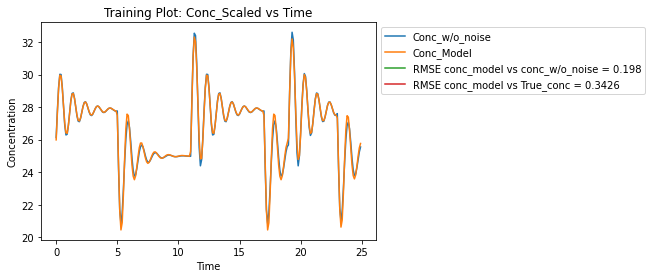

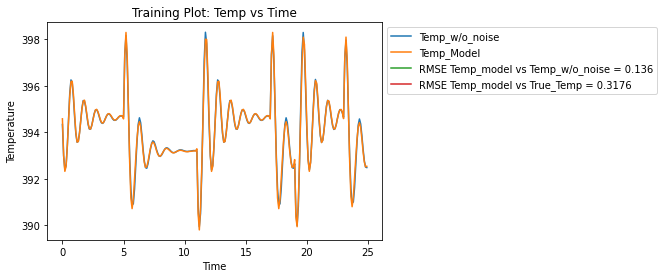

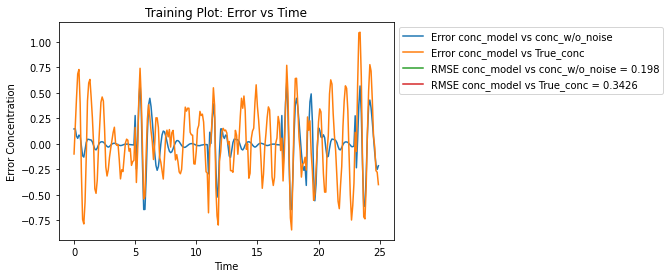

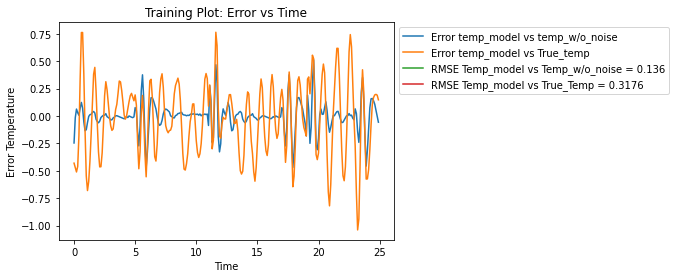

In [ ]:
#true = target[200:450]
true = y_train.detach().cpu().numpy()

# checktrain = torch.from_numpy(data[200:450].astype(np.float32))
# checktrain = checktrain.to(device)

checktrain = x_train

p_result = model(checktrain)
p = p_result[0].cpu().detach().numpy()

###########################

# p[:,0] = p[:,0]/100
##########################
error_train_conc = MSE(true[:,0],p[:,0])
error_train_conc_graph = true[:,0]-p[:,0]
error_train_temp = MSE(true[:,1],p[:,1])
error_train_temp_graph = true[:,1]-p[:,1]
error_train_conc2 = MSE(True_states2[:,0],p[:,0])
error_train_conc2_graph = True_states2[:,0]-p[:,0]
error_train_temp2 = MSE(True_states2[:,1],p[:,1])
error_train_temp2_graph = True_states2[:,1]-p[:,1]



print('error conc model vs true value',np.sqrt(error_train_conc))
print(np.sqrt(error_train_temp))

print(np.sqrt(error_train_conc2))
print(np.sqrt(error_train_temp2))

x = 0.1*np.arange(0,len(checktrain[200:450,0]))
plt.figure(1)
plt.plot(x,true[200:450,0], label='Conc_w/o_noise')
plt.plot(x, p[200:450,0], label='Conc_Model')
plt.plot([], [], label='RMSE conc_model vs conc_w/o_noise = 0.198')
plt.plot([], [], label='RMSE conc_model vs True_conc = 0.3426')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Training Plot: Conc_Scaled vs Time')

plt.figure(2)
plt.plot(x,true[200:450,1], label='Temp_w/o_noise')
plt.plot(x, p[200:450,1], label='Temp_Model')
plt.plot([], [], label='RMSE Temp_model vs Temp_w/o_noise = 0.136')
plt.plot([], [], label='RMSE Temp_model vs True_Temp = 0.3176')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Training Plot: Temp vs Time')

plt.figure(3)
plt.plot(x,error_train_conc_graph[200:450], label='Error conc_model vs conc_w/o_noise')
plt.plot(x,error_train_conc2_graph[200:450], label='Error conc_model vs True_conc')
plt.plot([], [], label='RMSE conc_model vs conc_w/o_noise = 0.198')
plt.plot([], [], label='RMSE conc_model vs True_conc = 0.3426')
plt.xlabel('Time')
plt.ylabel('Error Concentration')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Training Plot: Error vs Time')

plt.figure(4)
plt.plot(x,error_train_temp_graph[200:450], label='Error temp_model vs temp_w/o_noise')
plt.plot(x,error_train_temp2_graph[200:450], label='Error temp_model vs True_temp')
plt.plot([], [], label='RMSE Temp_model vs Temp_w/o_noise = 0.136')
plt.plot([], [], label='RMSE Temp_model vs True_Temp = 0.3176')
plt.xlabel('Time')
plt.ylabel('Error Temperature')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Training Plot: Error vs Time')

In [ ]:
p[:10]

array([[ 25.926655, 392.9743  ],
       [ 25.324581, 393.4391  ],
       [ 24.747433, 393.7648  ],
       [ 24.353333, 393.8722  ],
       [ 24.213951, 393.77206 ],
       [ 24.325417, 393.51328 ],
       [ 24.610264, 393.20425 ],
       [ 24.956272, 392.95166 ],
       [ 25.25024 , 392.82248 ],
       [ 25.415241, 392.8303  ]], dtype=float32)

## Validation plot

In [ ]:
# validating_target = target[13333:13520]

validating_target = y_test.detach().cpu().numpy()
validating_predictions = []
i=0

while len(validating_predictions)<len(validating_target):

    input_ = x_test[i].view(1,T,4)    # convert the x_test[i] which is 2d to 3d
    p_result = model(input_)

    j= np.array(p_result[0].detach().cpu())

    validating_predictions.append(j)

    i+=1

validating_predictions = np.array(validating_predictions).reshape(-1,2)
# validating_predictions = np.asarray(validating_predictions)
print(validating_predictions.shape)
print(validating_target.shape)



(1657, 2)
(1657, 2)


0.18905543
0.13100788
0.3550960368940208
0.3382360379925481


Text(0.5, 1.0, 'Validation Plot: Error vs Time')

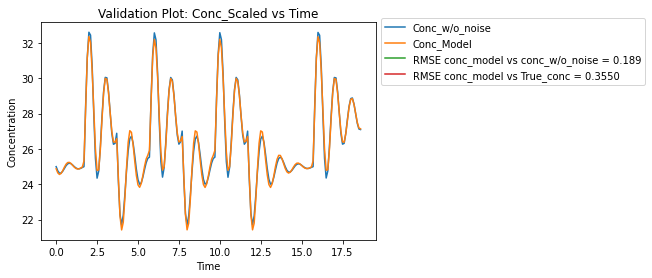

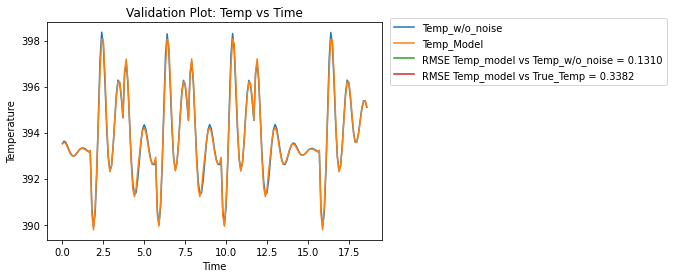

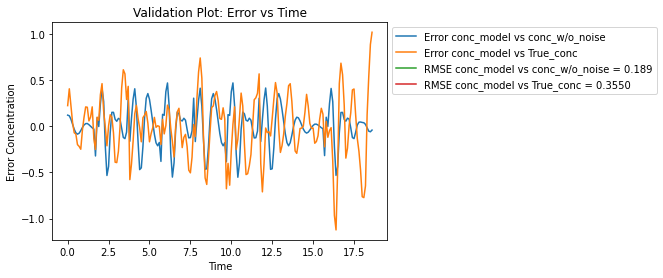

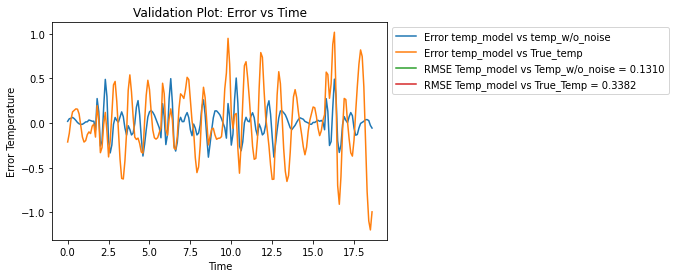

In [ ]:
x = 0.1*np.arange(0,len(validating_target[:187,0]))


_, True_states = Dataloader(series,series_statewithnoise,T)
True_states2 = True_states[13333:]
True_states2[:,0] = 100*True_states2[:,0]

error_train_conc = MSE(validating_target[:,0],validating_predictions[:,0])
error_train_conc_graph = validating_target[:,0]-validating_predictions[:,0]
error_train_temp = MSE(validating_target[:,1],validating_predictions[:,1])
error_train_temp_graph = validating_target[:,1]-validating_predictions[:,1]
error_train_conc2 = MSE(True_states2[:,0],validating_predictions[:,0])
error_train_conc2_graph = True_states2[:,0]-validating_predictions[:,0]
error_train_temp2 = MSE(True_states2[:,1],validating_predictions[:,1])
error_train_temp2_graph = True_states2[:,1]-validating_predictions[:,1]


print(np.sqrt(error_train_conc))
print(np.sqrt(error_train_temp))
print(np.sqrt(error_train_conc2))
print(np.sqrt(error_train_temp2))


plt.figure(1)
plt.plot(x,validating_target[:187,0], label='Conc_w/o_noise')
plt.plot(x,validating_predictions[:187,0], label='Conc_Model')
plt.plot([],[], label='RMSE conc_model vs conc_w/o_noise = 0.189')
plt.plot([],[], label='RMSE conc_model vs True_conc = 0.3550')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend(bbox_to_anchor=(1.82, 0.69),loc = 'lower right')
plt.title('Validation Plot: Conc_Scaled vs Time')

plt.figure(2)
plt.plot(x,validating_target[:187,1], label='Temp_w/o_noise')
plt.plot(x,validating_predictions[:187,1], label='Temp_Model')
plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1310')
plt.plot([],[], label='RMSE Temp_model vs True_Temp = 0.3382')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend(bbox_to_anchor=(1.865, 0.69),loc = 'lower right')
plt.title('Validation Plot: Temp vs Time')


plt.figure(3)
plt.plot(x,error_train_conc_graph[:187], label='Error conc_model vs conc_w/o_noise')
plt.plot(x,error_train_conc2_graph[:187], label='Error conc_model vs True_conc')
plt.plot([],[], label='RMSE conc_model vs conc_w/o_noise = 0.189')
plt.plot([],[], label='RMSE conc_model vs True_conc = 0.3550')
plt.xlabel('Time')
plt.ylabel('Error Concentration')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Validation Plot: Error vs Time')

plt.figure(4)
plt.plot(x,error_train_temp_graph[:187], label='Error temp_model vs temp_w/o_noise')
plt.plot(x,error_train_temp2_graph[:187], label='Error temp_model vs True_temp')
plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1310')
plt.plot([],[], label='RMSE Temp_model vs True_Temp = 0.3382')
plt.xlabel('Time')
plt.ylabel('Error Temperature')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Validation Plot: Error vs Time')

## Test Plots

## dataloader function

In [ ]:
def Dataloader(seriesss,target,T):
     
     data4 = []
     output = []

     for i in range(len(seriesss)-T):
         x = seriesss[i:i+T]
         data4.append(x)

         y = target[i+T-1]
         output.append(y)

     data4 = np.asarray(data4)
     output = np.asarray(output)

     data4 = data4.reshape(-1,T,4)
     output = output.reshape(-1,2)# change when output length changes


     return data4,output

In [ ]:
print(series_test.shape)
print(series_test_temp.shape)

(1666, 4)
(1666, 2)


In [ ]:
test_output = series_test_temp

inputtest, outputtest = Dataloader(series_test, test_output,T)

print(inputtest.shape,outputtest.shape)

print(type(inputtest))

inputtest = torch.from_numpy(inputtest.astype(np.float32))
print(type(inputtest))

inputtest = inputtest.to(device)

print(outputtest)

(1656, 10, 4) (1656, 2)
<class 'numpy.ndarray'>
<class 'torch.Tensor'>
[[ 26.668 392.6  ]
 [ 25.829 393.6  ]
 [ 24.878 394.33 ]
 ...
 [ 32.541 390.53 ]
 [ 32.394 392.27 ]
 [ 30.668 394.75 ]]


## Applying model

In [ ]:
with torch.no_grad():
    testset_predictions = model(inputtest)

    testset_predictions = np.asarray(testset_predictions[0].cpu())
    
print(testset_predictions.shape)

(1656, 2)


## Visualization

In [ ]:

_, True_states = Dataloader(series_test,series_test_statewithnoise,T)
True_states2 = True_states
True_states2[:,0] = 100*True_states2[:,0]


0.1897410303790047
0.1294970837026272
0.33326469509037426
0.3031016612484564


Text(0.5, 1.0, 'Test Plot: Error vs Time')

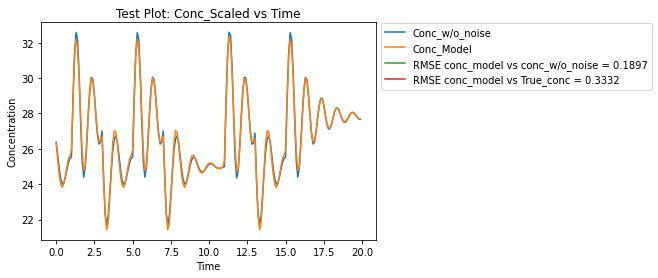

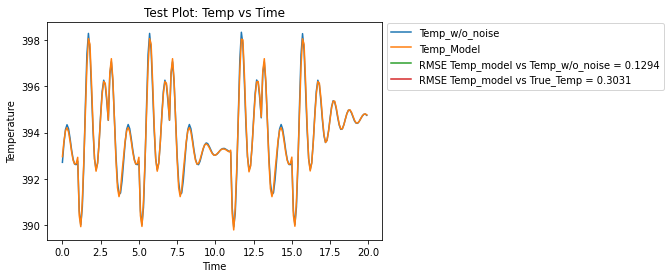

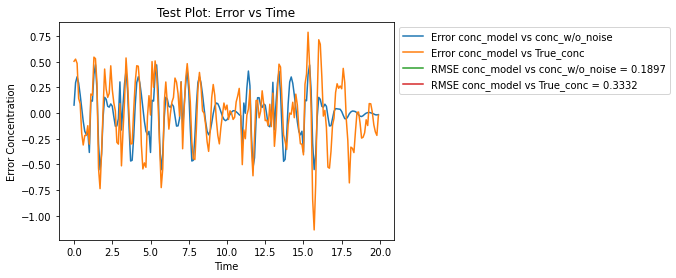

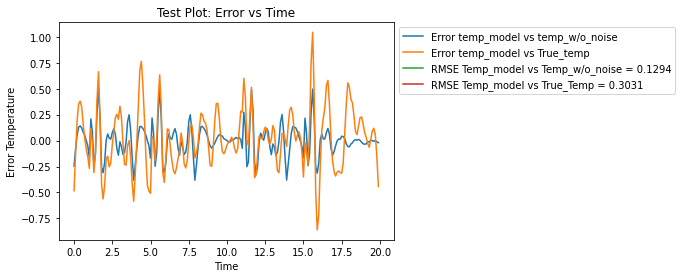

In [ ]:
x = 0.1*np.arange(0,len(testset_predictions[600:800,0]))


error_train_conc = MSE(outputtest[:,0],testset_predictions[:,0])
error_train_temp = MSE(outputtest[:,1],testset_predictions[:,1])
error_train_conc2 = MSE(True_states2[:,0],testset_predictions[:,0])
error_train_temp2 = MSE(True_states2[:,1],testset_predictions[:,1])

error_train_conc_graph = outputtest[:,0]-testset_predictions[:,0]
error_train_temp_graph = outputtest[:,1]-testset_predictions[:,1]
error_train_conc2_graph = True_states2[:,0]-testset_predictions[:,0]
error_train_temp2_graph = True_states2[:,1]-testset_predictions[:,1]

print(np.sqrt(error_train_conc))
print(np.sqrt(error_train_temp))
print(np.sqrt(error_train_conc2))
print(np.sqrt(error_train_temp2))


plt.figure(1)
plt.plot(x,outputtest[600:800,0], label = 'Conc_w/o_noise')
plt.plot(x,testset_predictions[600:800,0],label='Conc_Model')
plt.plot([],[], label='RMSE conc_model vs conc_w/o_noise = 0.1897')
plt.plot([],[], label='RMSE conc_model vs True_conc = 0.3332')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Test Plot: Conc_Scaled vs Time')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best')

plt.figure(2)
plt.plot(x,outputtest[600:800,1], label = 'Temp_w/o_noise')
plt.plot(x,testset_predictions[600:800,1],label='Temp_Model')
plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1294')
plt.plot([],[], label='RMSE Temp_model vs True_Temp = 0.3031')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Test Plot: Temp vs Time')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best')


plt.figure(3)
plt.plot(x,error_train_conc_graph[600:800], label='Error conc_model vs conc_w/o_noise')
plt.plot(x,error_train_conc2_graph[600:800], label='Error conc_model vs True_conc')
plt.plot([],[], label='RMSE conc_model vs conc_w/o_noise = 0.1897')
plt.plot([],[], label='RMSE conc_model vs True_conc = 0.3332')
plt.xlabel('Time')
plt.ylabel('Error Concentration')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Test Plot: Error vs Time')

plt.figure(4)
plt.plot(x,error_train_temp_graph[600:800], label='Error temp_model vs temp_w/o_noise')
plt.plot(x,error_train_temp2_graph[600:800], label='Error temp_model vs True_temp')
plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1294')
plt.plot([],[], label='RMSE Temp_model vs True_Temp = 0.3031')
plt.xlabel('Time')
plt.ylabel('Error Temperature')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Test Plot: Error vs Time')


# Plots for inverse scaled (T&C)

In [ ]:
_, True_states = Dataloader(series,series_statewithnoise,T)
True_states2 = True_states[:13333]

0.001986642
0.13637944
0.0034261479065040693
0.3176336305978573


Text(0.5, 1.0, 'Training Plot: Temperature vs Time instant')

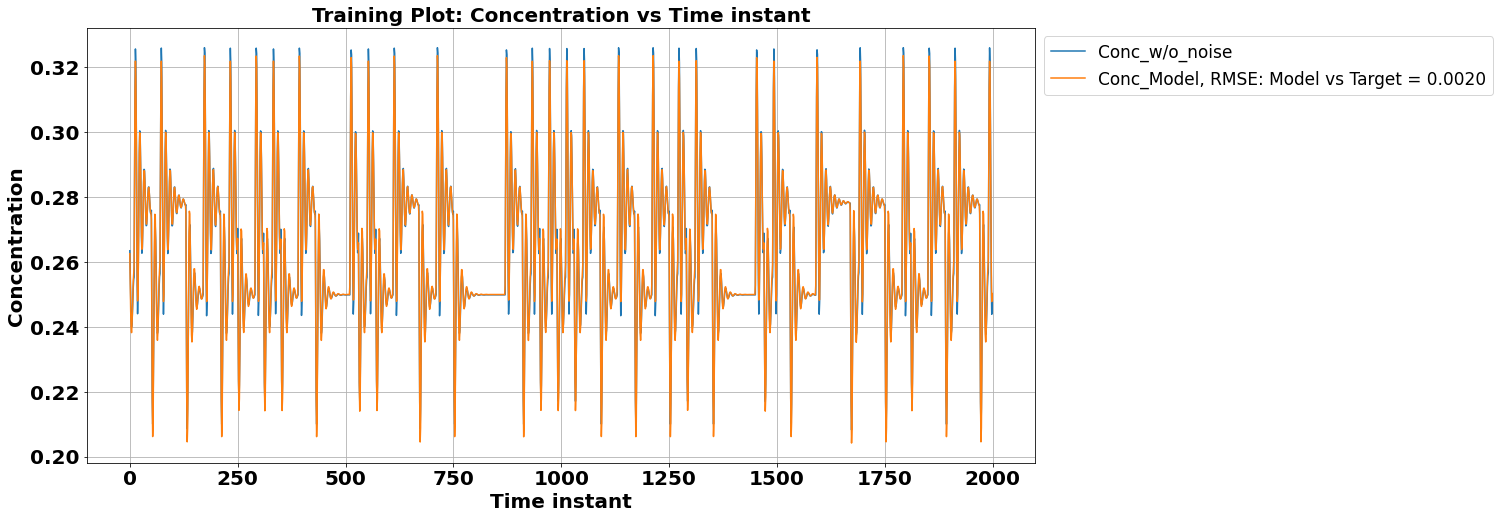

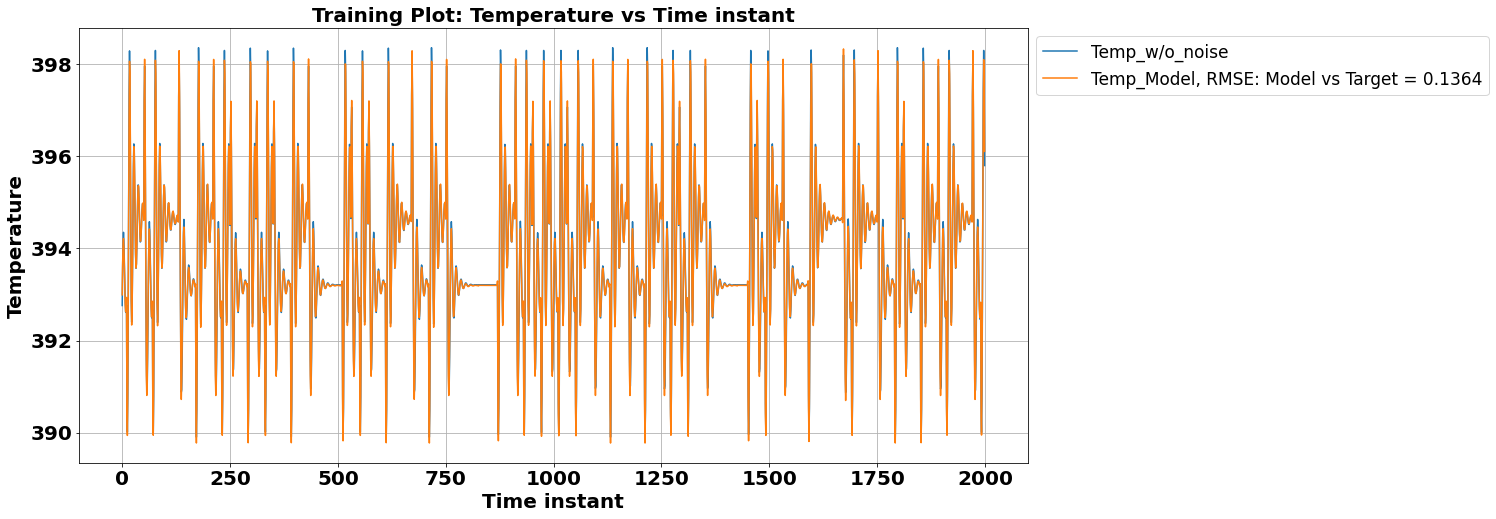

In [ ]:
#true = target[200:450]
true = y_train.detach().cpu().numpy()
true[:,0] = true[:,0]/100
# checktrain = torch.from_numpy(data[200:450].astype(np.float32))
# checktrain = checktrain.to(device)

checktrain = x_train

p_result = model(checktrain)
p = p_result[0].cpu().detach().numpy()

###########################

p[:,0] = p[:,0]/100
##########################
error_train_conc = MSE(true[:,0],p[:,0])
error_train_temp = MSE(true[:,1],p[:,1])
error_train_conc2 = MSE(True_states2[:,0],p[:,0])
error_train_temp2 = MSE(True_states2[:,1],p[:,1])

error_train_conc_graph = true[:,0]-p[:,0]
error_train_temp_graph = true[:,1]-p[:,1]
error_train_conc2_graph = True_states2[:,0]-p[:,0]
error_train_temp2_graph = True_states2[:,1]-p[:,1]

print(np.sqrt(error_train_conc))
print(np.sqrt(error_train_temp))

print(np.sqrt(error_train_conc2))
print(np.sqrt(error_train_temp2))

x = np.arange(0,len(checktrain[2000:4000]))
plt.figure(figsize=(17,8))
plt.plot(x,true[2000:4000,0], label='Conc_w/o_noise')
plt.plot(x, p[2000:4000,0], label='Conc_Model, RMSE: Model vs Target = {0:.4f}'.format(np.sqrt(error_train_conc)))
# plt.plot([], [], label='RMSE conc_model vs conc_w/o_noise = 0.00198')
# plt.plot([], [], label='RMSE conc_model vs True_conc = 0.003426')
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Concentration',fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.legend(bbox_to_anchor=(1, 1),loc='upper left',fontsize=17)
plt.title('Training Plot: Concentration vs Time instant',fontsize=20, fontweight='bold')

plt.figure(figsize=(17,8))
plt.plot(x,true[2000:4000,1], label='Temp_w/o_noise')
plt.plot(x, p[2000:4000,1], label='Temp_Model, RMSE: Model vs Target = {0:.4f}'.format(np.sqrt(error_train_temp)))
# plt.plot([], [], label='RMSE Temp_model vs Temp_w/o_noise = 0.136')
# plt.plot([], [], label='RMSE Temp_model vs True_Temp = 0.3176')
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Temperature',fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.legend(bbox_to_anchor=(1, 1),loc='upper left',fontsize=17)
plt.title('Training Plot: Temperature vs Time instant',fontsize=20, fontweight='bold')



## Validation Step

In [ ]:
validating_target = y_test.detach().cpu().numpy()

validating_target[:,0] = validating_target[:,0]/100
validating_predictions = []
i=0

while len(validating_predictions)<len(validating_target):

    input_ = x_test[i].view(1,T,4)    # convert the x_test[i] which is 2d to 3d
    p = model(input_)

    j= np.array(p[0].detach().cpu())

    validating_predictions.append(j)

    i+=1

validating_predictions = np.array(validating_predictions).reshape(-1,2)
# validating_predictions = np.asarray(validating_predictions)
print(validating_predictions.shape)
print(validating_target.shape)


##########################################################

validating_predictions[:,0] = validating_predictions[:,0]/100

##########################################################

(1657, 2)
(1657, 2)


0.0018905549
0.13100788
0.00355096065665083
0.3382360379925481


Text(0.5, 1.0, 'Validation Plot: Temperature vs Time instant')

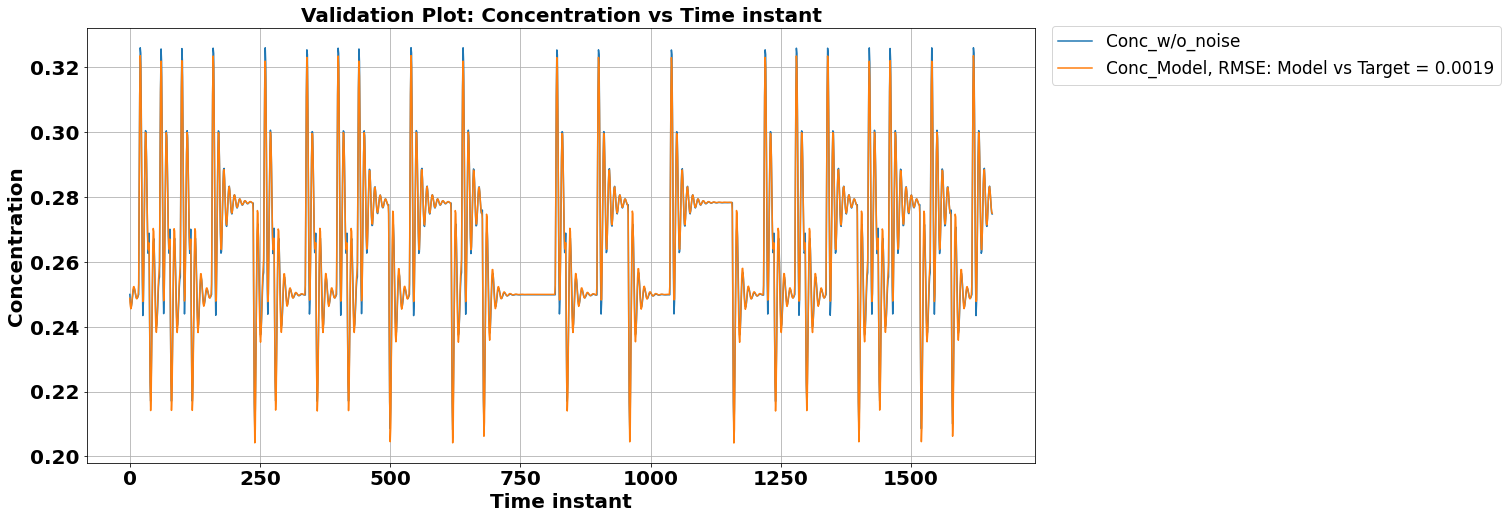

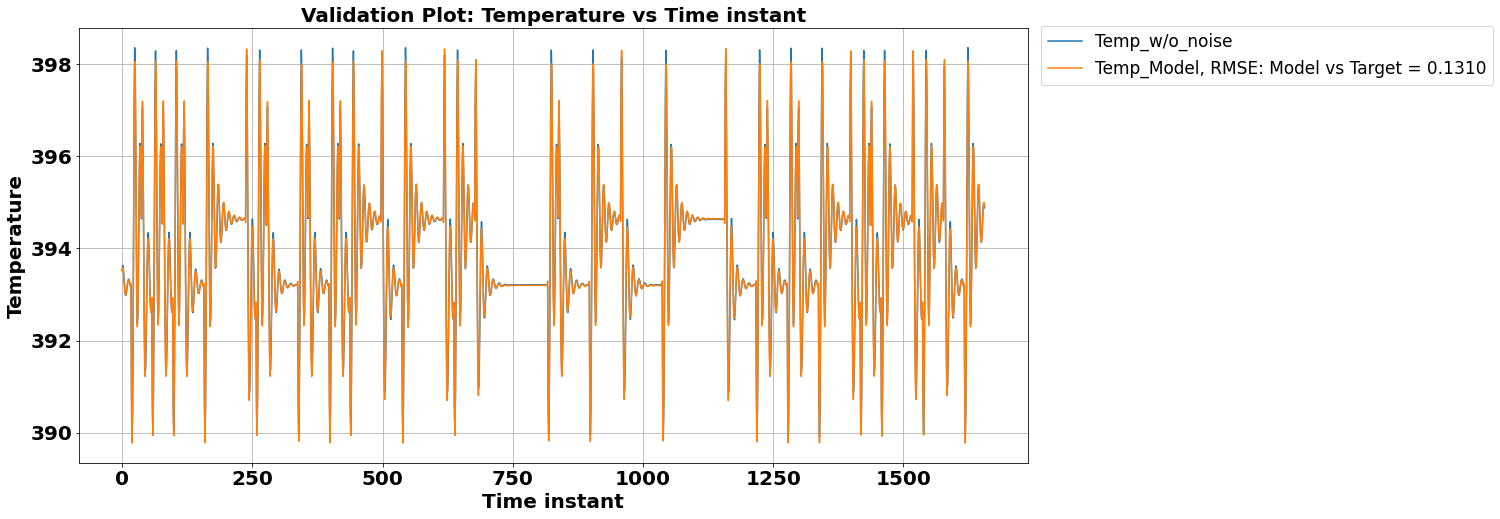

In [ ]:



_, True_states = Dataloader(series,series_statewithnoise,T)
True_states2 = True_states[13333:]
True_states2[:,0] = True_states2[:,0]

error_train_conc = MSE(validating_target[:,0],validating_predictions[:,0])
error_train_temp = MSE(validating_target[:,1],validating_predictions[:,1])
error_train_conc2 = MSE(True_states2[:,0],validating_predictions[:,0])
error_train_temp2 = MSE(True_states2[:,1],validating_predictions[:,1])

error_train_conc_graph = validating_target[:,0]-validating_predictions[:,0]
error_train_temp_graph = validating_target[:,1]-validating_predictions[:,1]
error_train_conc2_graph = True_states2[:,0]-validating_predictions[:,0]
error_train_temp2_graph = True_states2[:,1]-validating_predictions[:,1]

print(np.sqrt(error_train_conc))
print(np.sqrt(error_train_temp))
print(np.sqrt(error_train_conc2))
print(np.sqrt(error_train_temp2))




x = np.arange(0,len(validating_target[:,0]))

plt.figure(figsize=(17,8))
plt.plot(x,validating_target[:,0], label='Conc_w/o_noise')
plt.plot(x,validating_predictions[:,0], label='Conc_Model, RMSE: Model vs Target = {0:.4f}'.format(np.sqrt(error_train_conc)))
# plt.plot([],[], label='RMSE conc_model vs conc_w/o_noise = 0.00189')
# plt.plot([],[], label='RMSE conc_model vs True_conc = 0.003550')
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Concentration',fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.legend(bbox_to_anchor=(1.5, 0.85),loc = 'lower right',fontsize=17)
plt.title('Validation Plot: Concentration vs Time instant',fontsize=20, fontweight='bold')

plt.figure(figsize=(17,8))
plt.plot(x,validating_target[:,1], label='Temp_w/o_noise')
plt.plot(x,validating_predictions[:,1],label='Temp_Model, RMSE: Model vs Target = {0:.4f}'.format(np.sqrt(error_train_temp)))
# plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1310')
# plt.plot([],[], label='RMSE Temp_model vs True_Temp = 0.3382')
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Temperature',fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.legend(bbox_to_anchor=(1.5, 0.85),loc = 'lower right',fontsize=17)
plt.title('Validation Plot: Temperature vs Time instant',fontsize=20, fontweight='bold')

# plt.figure(3)
# plt.plot(x,error_train_conc_graph[:187], label='Error conc_model vs conc_w/o_noise')
# plt.plot(x,error_train_conc2_graph[:187], label='Error conc_model vs True_conc')
# plt.plot([],[], label='RMSE conc_model vs conc_w/o_noise = 0.00189')
# plt.plot([],[], label='RMSE conc_model vs True_conc = 0.003550')
# plt.xlabel('Time')
# plt.ylabel('Error Concentration')
# plt.legend(bbox_to_anchor=(1, 1))
# plt.title('Validation Plot: Error vs Time')

# plt.figure(4)
# plt.plot(x,error_train_temp_graph[:187], label='Error temp_model vs temp_w/o_noise')
# plt.plot(x,error_train_temp2_graph[:187], label='Error temp_model vs True_temp')
# plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1310')
# plt.plot([],[], label='RMSE Temp_model vs True_Temp = 0.3382')
# plt.xlabel('Time')
# plt.ylabel('Error Temperature')
# plt.legend(bbox_to_anchor=(1, 1))
# plt.title('Validation Plot: Error vs Time')






## Testing set

## dataloader function

In [ ]:
 def Dataloader(seriesss,target,T):
     
     data4 = []
     output = []

     for i in range(len(seriesss)-T):
         x = seriesss[i:i+T]
         data4.append(x)

         y = target[i+T-1]
         output.append(y)

     data4 = np.asarray(data4)
     output = np.asarray(output)

     data4 = data4.reshape(-1,T,4)
     output = output.reshape(-1,2)# change when output length changes


     return data4,output

In [ ]:
print(series_test.shape)
print(series_test_temp.shape)


(1666, 4)
(1666, 2)


In [ ]:
print(series_test_temp)

[[ 24.23  397.23 ]
 [ 21.784 397.96 ]
 [ 21.001 396.86 ]
 ...
 [ 32.394 392.27 ]
 [ 30.668 394.75 ]
 [ 27.97  397.12 ]]


In [ ]:
print(series_test)

[[9.0000e-01 1.3500e+01 3.9470e+02 2.7571e-01]
 [9.0000e-01 1.3500e+01 3.9723e+02 2.4230e-01]
 [9.0000e-01 1.3500e+01 3.9796e+02 2.1784e-01]
 ...
 [1.1000e+00 1.6500e+01 3.9053e+02 3.2541e-01]
 [1.1000e+00 1.6500e+01 3.9227e+02 3.2394e-01]
 [1.1000e+00 1.6500e+01 3.9475e+02 3.0668e-01]]


In [ ]:

test_output = series_test_temp

inputtest, outputtest = Dataloader(series_test, test_output,T)

print(inputtest.shape,outputtest.shape)

print(type(inputtest))

inputtest = torch.from_numpy(inputtest.astype(np.float32))
print(type(inputtest))

inputtest = inputtest.to(device)

print(outputtest)

(1656, 10, 4) (1656, 2)
<class 'numpy.ndarray'>
<class 'torch.Tensor'>
[[ 26.668 392.6  ]
 [ 25.829 393.6  ]
 [ 24.878 394.33 ]
 ...
 [ 32.541 390.53 ]
 [ 32.394 392.27 ]
 [ 30.668 394.75 ]]


## Applying model

In [ ]:
with torch.no_grad():
    testset_predictions = model(inputtest)

    testset_predictions = np.asarray(testset_predictions[0].cpu())
    
print(testset_predictions.shape)

(1656, 2)


In [ ]:
## CONVERTING BACK THE SCALED CONC
############################################################

outputtest[:,0] = outputtest[:,0]/100
testset_predictions[:,0] = testset_predictions[:,0]/100

############################################################

# print(outputtest[:,0]/1000)

In [ ]:
testset_predictions[:,0]

array([0.26568377, 0.25458848, 0.24447161, ..., 0.32303455, 0.32000145,
       0.3041594 ], dtype=float32)

##Visualization

In [ ]:

_, True_states = Dataloader(series_test,series_test_statewithnoise,T)
True_states2 = True_states
True_states2[:,0] = True_states2[:,0]


0.0018974107524274229
0.1294970837026272
0.0033326470840651643
0.3031016612484564


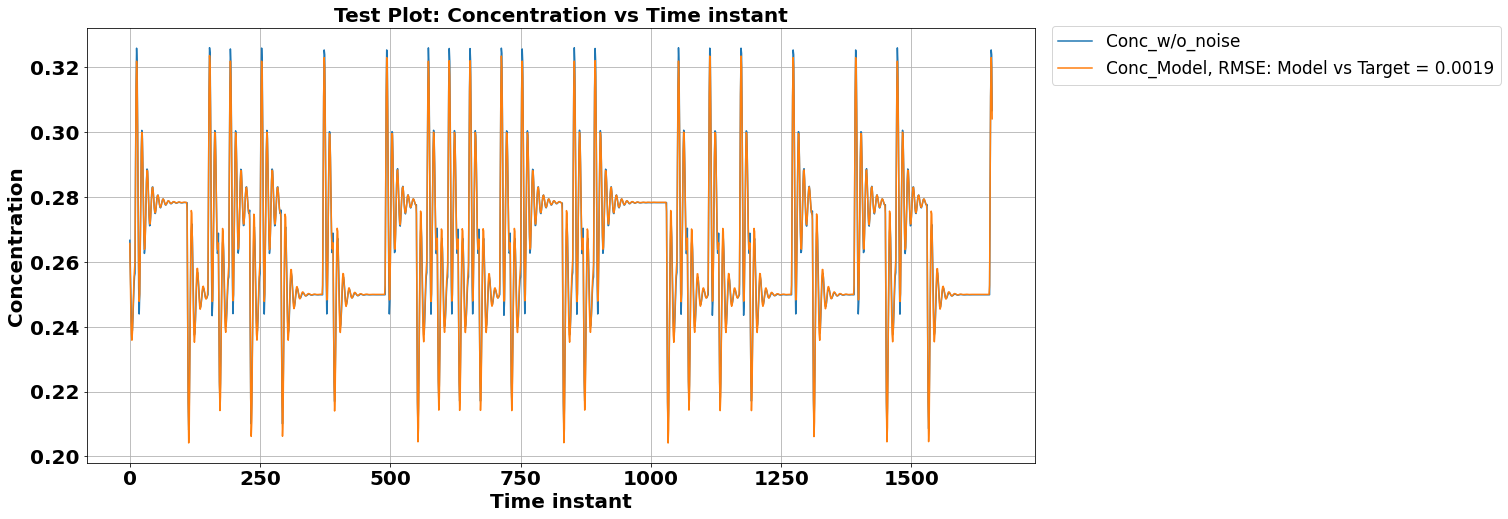

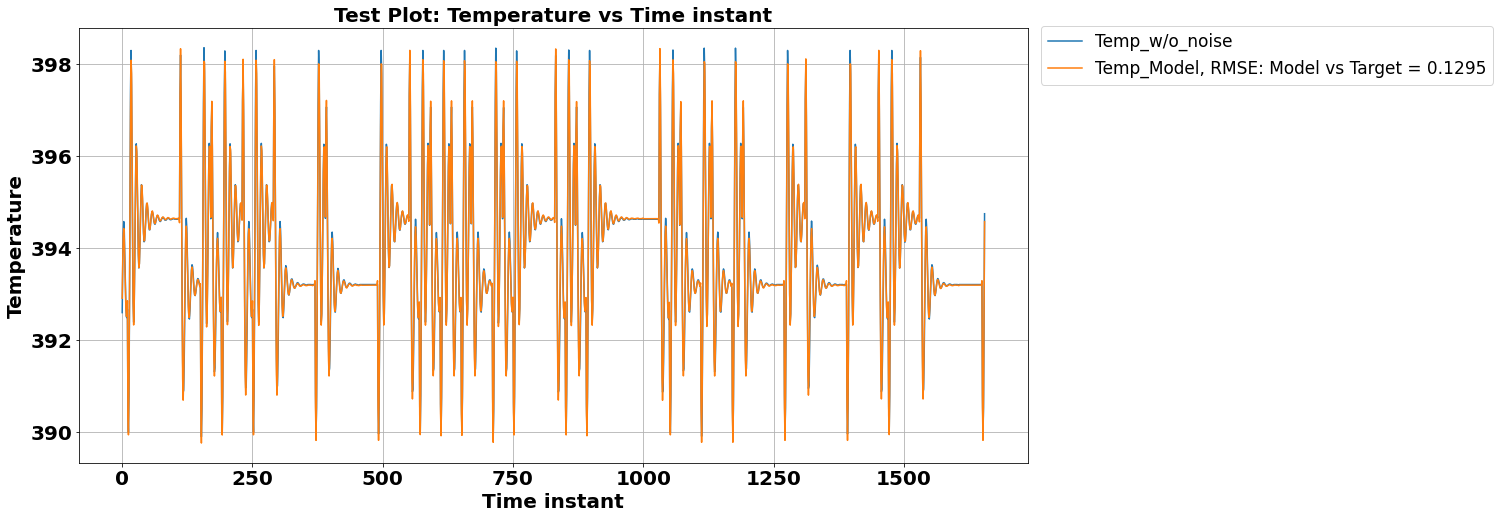

In [ ]:
x = np.arange(0,len(testset_predictions[600:800,0]))


error_train_conc = MSE(outputtest[:,0],testset_predictions[:,0])
error_train_temp = MSE(outputtest[:,1],testset_predictions[:,1])
error_train_conc2 = MSE(True_states2[:,0],testset_predictions[:,0])
error_train_temp2 = MSE(True_states2[:,1],testset_predictions[:,1])

error_train_conc_graph = outputtest[:,0]-testset_predictions[:,0]
error_train_temp_graph = outputtest[:,1]-testset_predictions[:,1]
error_train_conc2_graph = True_states2[:,0]-testset_predictions[:,0]
error_train_temp2_graph = True_states2[:,1]-testset_predictions[:,1]

print(np.sqrt(error_train_conc))
print(np.sqrt(error_train_temp))
print(np.sqrt(error_train_conc2))
print(np.sqrt(error_train_temp2))


x = np.arange(0,len(testset_predictions[:,0]))

plt.figure(figsize=(17,8))
plt.plot(x,outputtest[:,0], label = 'Conc_w/o_noise')
plt.plot(x,testset_predictions[:,0], label='Conc_Model, RMSE: Model vs Target = {0:.4f}'.format(np.sqrt(error_train_conc)))
# plt.plot([],[], label='RMSE conc_model vs conc_w/o_noise = 0.001897')
# plt.plot([],[], label='RMSE conc_model vs True_conc = 0.003332')
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Concentration',fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.title('Test Plot: Concentration vs Time instant',fontsize=20, fontweight='bold')
plt.legend(bbox_to_anchor=(1.5, 0.85),loc = 'lower right',fontsize=17)

plt.figure(figsize=(17,8))
plt.plot(x,outputtest[:,1], label = 'Temp_w/o_noise')
plt.plot(x,testset_predictions[:,1],label='Temp_Model, RMSE: Model vs Target = {0:.4f}'.format(np.sqrt(error_train_temp)) )
# plt.plot([],[], label='RMSE Temp_model vs Temp_w/o_noise = 0.1294')
# plt.plot([],[], label='RMSE Temp_model vs True_Temp = 0.3031')
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Temperature',fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.title('Test Plot: Temperature vs Time instant',fontsize=20, fontweight='bold')
plt.legend(bbox_to_anchor=(1.5, 0.85),loc = 'lower right',fontsize=17)



# Multistep Prediction using model

## Preparing Data

In [ ]:
# using dataloader to generate data:


inputnew, outputnew = Dataloader(series_test, series_test_temp,T)
print(inputnew.shape,outputnew.shape)
print('\nType of input data:',type(inputnew))

inputnew = torch.from_numpy(inputnew.astype(np.float32))
print('\nType of input data:',type(inputnew))
print('\nType of output data:',type(outputnew))

inputnew = inputnew.to(device)

(1656, 10, 4) (1656, 2)

Type of input data: <class 'numpy.ndarray'>

Type of input data: <class 'torch.Tensor'>

Type of output data: <class 'numpy.ndarray'>


In [ ]:
inputnew[0].view(T,4)

tensor([[9.0000e-01, 1.3500e+01, 3.9470e+02, 2.7571e-01],
        [9.0000e-01, 1.3500e+01, 3.9723e+02, 2.4230e-01],
        [9.0000e-01, 1.3500e+01, 3.9796e+02, 2.1784e-01],
        [9.0000e-01, 1.3500e+01, 3.9686e+02, 2.1001e-01],
        [9.0000e-01, 1.3500e+01, 3.9488e+02, 2.1638e-01],
        [9.0000e-01, 1.3500e+01, 3.9295e+02, 2.3051e-01],
        [9.0000e-01, 1.3500e+01, 3.9159e+02, 2.4654e-01],
        [9.0000e-01, 1.3500e+01, 3.9095e+02, 2.6020e-01],
        [9.0000e-01, 1.3500e+01, 3.9102e+02, 2.6872e-01],
        [9.0000e-01, 1.3500e+01, 3.9164e+02, 2.7080e-01]])

In [ ]:


validating_predictions = []

last_x = inputnew[0].view(T,4)
i=0
while len(validating_predictions)<(len(outputnew)-1):
    i = i+1
    input_ = last_x.reshape(1,T,4)    # done as input needs 3 dimension (needs 1 as batch dimension too !!)
    p = model(input_)
    validating_predictions.append(p[0].detach().cpu().numpy())
    #last_x = inputnew[i].view(T,4)

    last_x[0] = last_x[1]
    last_x[1] = last_x[2]
    last_x[2] = last_x[3]
    last_x[3] = last_x[4]
    last_x[4] = last_x[5]
    last_x[5] = last_x[6]
    last_x[6] = last_x[7]
    last_x[7] = last_x[8]
    last_x[8] = last_x[9]

    last_x[9][0] = inputnew[i][9,0]
    last_x[9][1] = inputnew[i][9,1]
    #last_x[2][0] = inputnew[i][2,0]
    #last_x[2][1] = inputnew[i][2,1]

    last_x[9][2] = p[0][0,1].detach().item()      # substituting TEmp with predicted temp
    last_x[9][3] = (p[0][0,0].detach().item())/100 # substituting Temp with predicted conc
    #last_x[2][2] = p[0][0,1].detach().item()            # substituting TEmp with predicted temp
    #last_x[2][3] = (p[0][0,0].detach().item())#/100      # substituting Temp with predicted conc



print(type(validating_predictions))

validating_predictions = np.asarray(validating_predictions)
print(validating_predictions.shape)
validating_predictions = np.asarray(validating_predictions).reshape(-1,2)
print(validating_predictions.shape)



<class 'list'>
(1655, 1, 2)
(1655, 2)


In [ ]:
'''

validating_predictions = []

last_x = inputnew[0].view(T,4)
i=0
while len(validating_predictions)<(len(outputnew)-1):
    i = i+1
    input_ = last_x.reshape(1,T,4)    # done as input needs 3 dimension (needs 1 as batch dimension too !!)
    
    p = model(input_)
    validating_predictions.append(p[0].detach().cpu().numpy())
    #last_x = inputnew[i].view(T,4)
    if T==10:

      last_x[0] = last_x[1]
      last_x[1] = last_x[2]
      last_x[2] = last_x[3]
      last_x[3] = last_x[4]
      last_x[4] = last_x[5]
      last_x[5] = last_x[6]
      last_x[6] = last_x[7]
      last_x[7] = last_x[8]
      last_x[8] = last_x[9]
      last_x[9][0] = inputnew[i][9,0]
      last_x[9][1] = inputnew[i][9,1]
      last_x[9][2] = p[0][0,1].detach().item()            # substituting TEmp with predicted temp
      last_x[9][3] = (p[0][0,0].detach().item())#/100      # substituting Temp with predicted conc

    else:

      last_x[0][0] = inputnew[i][0,0]
      last_x[0][1] = inputnew[i][0,1]

    # last_x[9][2] = p[0,1].detach().item()      # substituting TEmp with predicted temp
    # last_x[9][3] = (p[0,0].detach().item())/100 # substituting Temp with predicted conc
      last_x[0][2] = p[0][0,1].detach().item()            # substituting TEmp with predicted temp
      last_x[0][3] = (p[0][0,0].detach().item())#/100      # substituting Temp with predicted conc



print(type(validating_predictions))

validating_predictions = np.asarray(validating_predictions)
print(validating_predictions.shape)
validating_predictions = np.asarray(validating_predictions).reshape(-1,2)
print(validating_predictions.shape)

'''

'\n\nvalidating_predictions = []\n\nlast_x = inputnew[0].view(T,4)\ni=0\nwhile len(validating_predictions)<(len(outputnew)-1):\n    i = i+1\n    input_ = last_x.reshape(1,T,4)    # done as input needs 3 dimension (needs 1 as batch dimension too !!)\n    \n    p = model(input_)\n    validating_predictions.append(p[0].detach().cpu().numpy())\n    #last_x = inputnew[i].view(T,4)\n    if T==10:\n\n      last_x[0] = last_x[1]\n      last_x[1] = last_x[2]\n      last_x[2] = last_x[3]\n      last_x[3] = last_x[4]\n      last_x[4] = last_x[5]\n      last_x[5] = last_x[6]\n      last_x[6] = last_x[7]\n      last_x[7] = last_x[8]\n      last_x[8] = last_x[9]\n      last_x[9][0] = inputnew[i][9,0]\n      last_x[9][1] = inputnew[i][9,1]\n      last_x[9][2] = p[0][0,1].detach().item()            # substituting TEmp with predicted temp\n      last_x[9][3] = (p[0][0,0].detach().item())#/100      # substituting Temp with predicted conc\n\n    else:\n\n      last_x[0][0] = inputnew[i][0,0]\n      last_

In [ ]:
validating_predictions

array([[ 26.568356, 392.91196 ],
       [ 25.371067, 394.01236 ],
       [ 24.302902, 394.60703 ],
       ...,
       [ 31.12262 , 389.3497  ],
       [ 32.3895  , 390.1807  ],
       [ 32.05889 , 392.1483  ]], dtype=float32)

In [ ]:

_, True_states = Dataloader(series_test,series_test_statewithnoise,T)
True_states2 = True_states
True_states2[:,0] = 100*True_states2[:,0]


In [ ]:
True_states2

array([[ 26.77022, 392.5748 ],
       [ 25.91491, 393.6614 ],
       [ 24.87281, 394.4901 ],
       ...,
       [ 32.27377, 390.6063 ],
       [ 32.2805 , 392.2127 ],
       [ 30.67649, 394.5432 ]])

## Visualization

0.388286726743981
0.4212082749513296
0.47734510522667367
0.5046476138019264


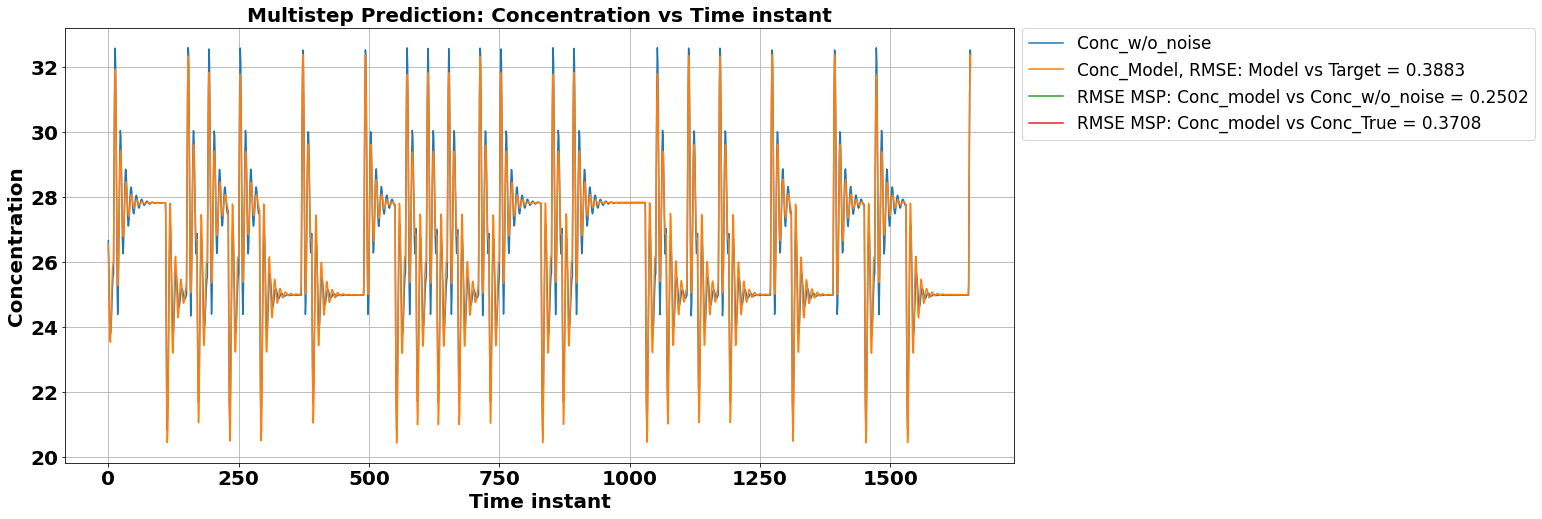

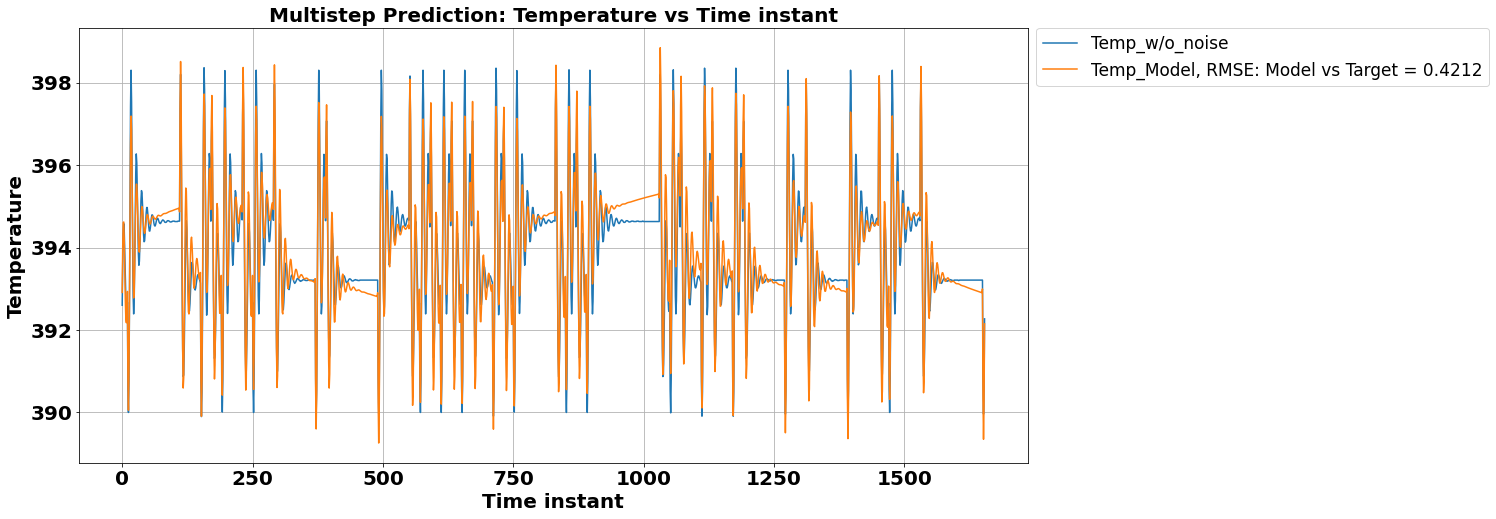

In [ ]:
error_train_conc = MSE(outputnew[:1665-T,0],validating_predictions[:,0])
error_train_temp = MSE(outputnew[:1665-T,1],validating_predictions[:,1])
error_train_conc2 = MSE(True_states2[:1665-T,0],validating_predictions[:,0])
error_train_temp2 = MSE(True_states2[:1665-T,1],validating_predictions[:,1])

error_train_conc_graph = outputnew[:1665-T,0]-validating_predictions[:,0]
error_train_temp_graph = outputnew[:1665-T,1]-validating_predictions[:,1]
error_train_conc2_graph = True_states2[:1665-T,0]-validating_predictions[:,0]
error_train_temp2_graph = True_states2[:1665-T,1]-validating_predictions[:,1]

print(np.sqrt(error_train_conc))
print(np.sqrt(error_train_temp))
print(np.sqrt(error_train_conc2))
print(np.sqrt(error_train_temp2))





time = [i for i in range(1665-T)]

time = np.array(time)


plt.figure(figsize=(17,8))

plt.plot(time,outputnew[:1665-T,0], label = 'Conc_w/o_noise')
plt.plot(time,validating_predictions[:,0], label='Conc_Model, RMSE: Model vs Target = {0:.4f}'.format(np.sqrt(error_train_conc)))
plt.plot([],[], label = 'RMSE MSP: Conc_model vs Conc_w/o_noise = 0.2502')
plt.plot([],[], label = 'RMSE MSP: Conc_model vs Conc_True = 0.3708')
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Concentration',fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.title('Multistep Prediction: Concentration vs Time instant',fontsize=20, fontweight='bold')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best',fontsize=17)

plt.figure(figsize=(17,8))

plt.plot(time,outputnew[:1665-T,1], label = 'Temp_w/o_noise')
plt.plot(time,validating_predictions[:,1],label='Temp_Model, RMSE: Model vs Target = {0:.4f}'.format(np.sqrt(error_train_temp)))
# plt.plot([],[], label = 'RMSE MSP: Temp_model vs Temp_w/o_noise = 0.3746')
# plt.plot([],[], label = 'RMSE MSP: Temp_model vs Temp_True = 0.4604')
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Temperature',fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.title('Multistep Prediction: Temperature vs Time instant',fontsize=20, fontweight='bold')
plt.legend(bbox_to_anchor=(1, 1.02),loc='best',fontsize=17)


# EKF

### Prepared phi matrix but the size of the matrix doesnt match with others as now states increases henc e have to make further modifications

In [ ]:


def EKF(x_est, x_pred, cov_est, u, yk, d,hidden1,hidden2,phi_test) :
    
    n_st =18
    n_op = 1
    n_ip=2

    Q = np.diagflat([0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2,0.012**2])

    #R = 0.25**2      ## Change if measurement noise changed
    R = np.diag([0.01**2 ,0.15**2])

    #C = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]      #this changed as there are 18 states now (when temp is only measured state)
    C= np.zeros((2,18))  # when conc and temp both are measured states
    C[0][16]=1
    C[1][17]=1                                                                                                                           

    C = np.array(C)
    C = np.mat(C) 

    x_pred = x_pred.reshape(n_st,1)
    yk = yk.reshape(2,1)
    u = u.reshape(n_ip,1)
    d= d.reshape(1,1)



###############################  FOR CHECKING IF HIDDEN VALUE 0 THEN MAKE CHANGES IN PHI ################
########################################### PHi from RNN ################################

    print('phi initial :',phi_test)
    for i in range(len(hidden1[0])):

        if hidden1[0][i]==0:
            for j in range(18):
                phi_test[i][j]=0
                phi_test[j][i]=0

    for i in range(len(hidden2[0])):

        if hidden2[0][i]==0:
            for j in range(18):
                phi_test[i+8][j]=0
                phi_test[j][i+8]=0


    
######################################################################################
    print('phi updated :',phi_test)
    phi_EKF = phi_test



    # one line calc gammad

    C_lin = C
    
    cov_pred = np.dot(phi_EKF,np.dot(cov_est,phi_EKF.T)) + Q

    kgain = np.dot(C_lin,np.dot(cov_pred,C_lin.T)) + R

    inv_kgain = kgain.I  
    


    K_gain = np.dot(cov_pred,np.dot(C_lin.T,inv_kgain))

    y_pred = np.dot(C_lin,x_pred)
    y_pred = y_pred.reshape(2,1)

    a = (yk - y_pred)

    b = np.dot(K_gain,a)

    x_est = x_pred + b
    cov_est = cov_pred - np.dot(K_gain, np.dot(C_lin,cov_pred))
              
    return x_est, y_pred, cov_est, cov_pred, phi_EKF, C_lin




# Prediction using past prediction (With EKF)


## DAtaloader

In [ ]:
def Dataloader(seriesss,target,disturbance1,mani_input,plant,mech_EKF,T):
     
     data4 = []
     output = []
     d = []
     minput = []
     pmeasurement = []
     result_1stEKF = []

     for i in range(len(seriesss)-T):
         x = seriesss[i:i+T]
         data4.append(x)

         y = target[i+T-1]
         output.append(y)

         z = disturbance1[i+T-1]
         d.append(z)

         w = mani_input[i+T-1]
         minput.append(w)

         v = plant[i+T-1]
         pmeasurement.append(v)

         f = mech_EKF[i+T-1]
         result_1stEKF.append(f)


     data4 = np.asarray(data4)
     output = np.asarray(output)
     d = np.asarray(d)
     minput = np.asarray(minput)
     pmeasurement = np.asarray(pmeasurement)
     result_1stEKF = np.asarray(result_1stEKF)


     data4 = data4.reshape(-1,T,4)
     output = output.reshape(-1,2)# change when output length changes
     d = d.reshape(-1,1)
     minput = minput.reshape(-1,2)
     pmeasurement = pmeasurement.reshape(-1,2)
     result_1stEKF = result_1stEKF.reshape(-1,2)

     return data4,output,d,minput,pmeasurement,result_1stEKF

## preparing data

In [ ]:


inputnew, outputnew_noisy, disturbancenew, minputnew, plantnew, mech_EKF_result = Dataloader(series_test, series_test_statewithnoise, series_test_disturbance, series_test_onlyinput,series_test_plantmeasurement,estimated_using_1stprinciple,T)


print('Disturbance shape:',disturbancenew.shape, type(disturbancenew))
print('Manipulated input shape:',minputnew.shape, type(minputnew))
print('Input shape:', inputnew.shape, type(inputnew))
print('Output shape:', outputnew_noisy.shape, type(outputnew_noisy))
print('plant measurement shape:', plantnew.shape, type(plantnew))
print('1st principle estimation shape:', mech_EKF_result.shape, type(plantnew))
print('\n')

print(inputnew.shape,outputnew_noisy.shape)
print('\nType of input data:',type(inputnew))

inputnew = torch.from_numpy(inputnew.astype(np.float32))
print('\nType of input data:',type(inputnew))
print('\nType of output data:',type(outputnew_noisy))

inputnew = inputnew.to(device)

Disturbance shape: (1656, 1) <class 'numpy.ndarray'>
Manipulated input shape: (1656, 2) <class 'numpy.ndarray'>
Input shape: (1656, 10, 4) <class 'numpy.ndarray'>
Output shape: (1656, 2) <class 'numpy.ndarray'>
plant measurement shape: (1656, 2) <class 'numpy.ndarray'>
1st principle estimation shape: (1656, 2) <class 'numpy.ndarray'>


(1656, 10, 4) (1656, 2)

Type of input data: <class 'numpy.ndarray'>

Type of input data: <class 'torch.Tensor'>

Type of output data: <class 'numpy.ndarray'>


## 1.2 Weights initialization

In [ ]:
## WEIGHTS AND BIAS FOR RNN
W_xh, W_hh1, b_xh, b_hh1, W_xh2, W_hh2, b_xh2, b_hh2 = model.rnn.parameters()

## WEIGHTS AND BIAS FOR OUTPUT LAYER
w, b = model.fc.parameters()

## Separating matrix of u and xy

W_manipulated_input = W_xh[:,:2]
W_states_input = W_xh[:,2:]

W_hidden2_xy = np.dot(W_xh2.cpu().detach().numpy(),W_states_input.cpu().detach().numpy())
W_hidden2_xh1 = np.dot(W_xh2.cpu().detach().numpy(),W_hh1.cpu().detach().numpy())
w_final_xy = np.dot(w.cpu().detach().numpy(),W_hidden2_xy)
w_final_xh1 = np.dot(w.cpu().detach().numpy(),W_hidden2_xh1)
w_final_xh2 =  np.dot(w.cpu().detach().numpy(),W_hh2.cpu().detach().numpy())

In [ ]:
print('w_states_input :', W_states_input.shape )
print('W_hidden2_xh1 :', W_hidden2_xh1.shape )
print('W_hidden2_xy :', W_hidden2_xy.shape )
print('w_final_xh1 :', w_final_xh1.shape )
print('w_final_xh2 :', w_final_xh2.shape )
print('w_final_xy :', w_final_xy.shape )

w_states_input : torch.Size([8, 2])
W_hidden2_xh1 : (8, 8)
W_hidden2_xy : (8, 2)
w_final_xh1 : (2, 8)
w_final_xh2 : (2, 8)
w_final_xy : (2, 2)


## Implementing EKF and prediction together

In [ ]:

validating_predictions = []

#x_est = [50,50,90,75,200,50,140,100,140,100,200,50,180,50,50,200,0.257,391.57]
#    NO NEED TO INITALIZE X(0|0) WITH 18 STATES AS X(0|0) IS REQUIRED FOR RNN AND IT ONLY REQUIRES CON(0|0) AND TEMP (0|0) 
# REST FOR EKF 1 STES ARE ADDED IN EKF FUNCTION SO AFTER 1ST ITERATION XEST(1|1) IS AUTOMATICALLY 18X18
x_est = [0.257,391.57]
x_est = np.array(x_est)
x_est_app = []

cov_est = np.diagflat([0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001])

last_x = inputnew[0].view(T,4)

# By doing this we are starting with x_hat_intial values which is standard procedure used for estimator
last_x[9][2]=x_est[1]
last_x[9][3]=x_est[0]


###################################################

phi_RNN = np.zeros((18,18))

phi_RNN = np.zeros((18,18))
for i in range(18):
    for j in range(18):
        if i<8:
          
            if j<8:
                phi_RNN[i,j]= W_hh1[i,j] 
            elif 7<j<16:
                phi_RNN[i,j] = 0
            else:
                phi_RNN[i,j] = W_states_input[i,j-16]

        if 7<i<16:
            if j<8:
                
                phi_RNN[i,j]=W_hidden2_xh1[i-8,j] 
            elif 7<j<16:
               
                phi_RNN[i,j] = W_hh2[i-8,j-8]
            else:
                phi_RNN[i,j] = W_hidden2_xy[i-8,j-16]

        if 15<i<18:
            if j<8:
                phi_RNN[i,j]= w_final_xh1[i-16,j] 
            elif 7<j<16:
                phi_RNN[i,j] = w_final_xh2[i-16,j-8]
            else:
                phi_RNN[i,j] = w_final_xy[i-16,j-16]   




phi_test = phi_RNN

######################################################

i=0

while len(validating_predictions)<(len(outputnew_noisy)-1):
    u = minputnew[i]
    d = 2
    d = np.array(d)
    yk = plantnew[i]

    print(i)

    i = i+1
    input_ = last_x.reshape(1,T,4)    # done as input needs 3 dimension (needs 1 as batch dimension too !!)
    p = model(input_)

    p[0][0,0] = (p[0][0,0])/100

    
#################################
    hidden1= p[1][0].cpu().detach().numpy()
    hidden2 = p[1][1].cpu().detach().numpy()
    
##################################

    test2=[]
    for item in hidden1[0]:
        test2.append(item)

    for item in hidden2[0]:
        test2.append(item)

    for item in p[0][0]:
        
        test2.append(item.cpu().detach().numpy())
    
    p_convert= np.array(test2)

    x_est, y_pred, cov_est, cov_pred, phi_EKF, C_lin  = EKF(x_est,p_convert,cov_est,u,yk,d,hidden1,hidden2,phi_test)  
 
    x_est = np.array(x_est)

    x_est_app.append(x_est.reshape(-1,18))

    cov_est = np.array(cov_est)

    dummy = torch.from_numpy(x_est.T.astype(np.float32))

    validating_predictions.append(p_convert)

    last_x[0] = last_x[1]
    last_x[1] = last_x[2]
    last_x[2] = last_x[3]
    last_x[3] = last_x[4]
    last_x[4] = last_x[5]
    last_x[5] = last_x[6]
    last_x[6] = last_x[7]
    last_x[7] = last_x[8]
    last_x[8] = last_x[9]

    last_x[9][0] = inputnew[i][9,0]
    last_x[9][1] = inputnew[i][9,1]

    last_x[9][2] = dummy[0,17]      # substituting Temp with predicted temp
    last_x[9][3] = dummy[0,16] # substituting Temp with predicted conc


In [ ]:
x_est_app2 = np.array(x_est_app)
validating_predictions2 = np.array(validating_predictions)
print('Shape of EKF prediction:',x_est_app2.shape)
print('Shape of model prediction:',validating_predictions2.shape)

x_est_app2 = x_est_app2.reshape(-1,18)
validating_predictions2 = validating_predictions2.reshape(-1,18)
print('Shape of EKF prediction reshape:',x_est_app2.shape)
print('Shape of model prediction reshape:',validating_predictions2.shape)

Shape of EKF prediction: (5, 1, 18)
Shape of model prediction: (5, 18)
Shape of EKF prediction reshape: (5, 18)
Shape of model prediction reshape: (5, 18)


In [ ]:
print('concentration: ',x_est_app2[100:120,16],'Temperature: ',x_est_app2[100:120,17],sep = '\n')

concentration: 
[]
Temperature: 
[]


## Visualization

In [ ]:
time = np.arange(0,len(x_est_app2[610:625,0]))

error_conc_EKF = MSE(outputnew_noisy[:1665-T,0],x_est_app2[:1665-T,16])
error_conc_Model = MSE(outputnew_noisy[:1665-T,0],validating_predictions2[:,16])

error_temp_EKF = MSE(outputnew_noisy[:1665-T,1],x_est_app2[:1665-T,17])
error_temp_Model = MSE(outputnew_noisy[:1665-T,1],validating_predictions2[:,17])
error_temp_Measurement = MSE(outputnew_noisy[:1665-T,1],plantnew[:1665-T,0])

error_conc_EKF_graph = outputnew_noisy[:1665-T,0]-x_est_app2[:1665-T,16]
error_conc_Model_graph = outputnew_noisy[:1665-T,0]-validating_predictions2[:,16]
error_temp_EKF_graph = outputnew_noisy[:1665-T,1]-x_est_app2[:1665-T,17]
error_temp_Model_graph = outputnew_noisy[:1665-T,1]-validating_predictions2[:,17]
error_temp_Measurement_graph = outputnew_noisy[:1665-T,1]-plantnew[:1665-T,0]


error_conc_PhyEKF = MSE(outputnew_noisy[:1665-T,0],mech_EKF_result[:1665-T,0])
error_temp_PhyEKF = MSE(outputnew_noisy[:1665-T,1],mech_EKF_result[:1665-T,1])

RMSE_phyEKF_conc = np.sqrt(error_conc_PhyEKF)
RMSE_phyEKF_temp = np.sqrt(error_temp_PhyEKF)

RMSE_EKF_conc = np.sqrt(error_conc_EKF)
RMSE_EKF_temp = np.sqrt(error_temp_EKF)

print('error_conc_EKF',np.sqrt(error_conc_EKF))
print('error_conc_Model',np.sqrt(error_conc_Model))
print('error_temp_EKF',np.sqrt(error_temp_EKF))
print('error_temp_Model',np.sqrt(error_temp_Model))
print('error_temp_Measurement',np.sqrt(error_temp_Measurement))

print('\n')
print(RMSE_phyEKF_conc)
print(RMSE_phyEKF_temp)


ValueError: ignored

In [ ]:
time = np.arange(0,len(x_est_app2[1000:1255,0]))

plt.figure(figsize=(17,8))
#plt.plot(time,outputnew_noisy[1000:1255,0],label='True_Conc')
plt.plot(time,plantnew[1000:1255,0],label='Plant_Height1')
#plt.plot(time,mech_EKF_result[1000:1255,0],label='Phy_EKF_Conc, RMSE: RNNEKF vs True = {0:.4f}'.format(RMSE_phyEKF_conc),color='forestgreen')
plt.plot(time,x_est_app2[1000:1255,16],'k+--',label='RNNEKF_Conc, RMSE: RNNEKF vs True = {0:.4f}'.format(RMSE_EKF_conc),linewidth=1,markersize=7.5)
#plt.plot([],[],label='RMSE Height1_EKF vs True_height1 = {0:.4f}'.format(RMSE_height1))
#plt.plot([],[],label='RMSE Height1_model vs True_height1 = {0:.4f}'.format(RMSE_height1_model))
plt.legend(bbox_to_anchor=(1.55, 0.78),loc='lower right',fontsize=17)
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Concentration',fontsize=20, fontweight='bold')
plt.title('Concentration vs Time instant',fontsize=20, fontweight='bold')

plt.figure(figsize=(17,8))
#plt.plot(time,outputnew_noisy[1000:1255,1],label='True_Temp')
plt.plot(time,plantnew[1000:1255,1],label='Plant_Temp',linewidth=2)
#plt.plot(time,mech_EKF_result[1000:1255,1],label='Phy_EKF_Temp, RMSE: RNNEKF vs True = {0:.4f}'.format(RMSE_phyEKF_temp),color='forestgreen')
plt.plot(time,x_est_app2[1000:1255,17],'k+--',label='RNNEKF_Temp, RMSE: RNNEKF vs True = {0:.4f}'.format(RMSE_EKF_temp),linewidth=1,markersize=7.5)
plt.legend(bbox_to_anchor=(1.55, 0.727),loc='lower right',fontsize=17)
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.grid()
plt.xlabel('Time instant',fontsize=20, fontweight='bold')
plt.ylabel('Temperature',fontsize=20, fontweight='bold')
plt.title('Temperature vs Time instant',fontsize=20, fontweight='bold')